<a href="https://colab.research.google.com/github/OsamaM0/Machine_Learning_Projects/blob/Optimization-Projects-(Soft-Computing)/Fuzzy_Logic_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library 

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import *

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")




# Data preparation 




In [ ]:
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")
df=data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


# Encoding The Non Numerically Value





In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])


In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,61.0,0,0,202.21,NaN,1,0,1,3,0,2
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2


### fill out bmi NULL values 

In [ ]:
df = df.dropna(axis=0, subset=['bmi'])
df.reset_index(drop=True, inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols_to_scale=["age","avg_glucose_level","bmi"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

In [ ]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
1433,0.145508,0,0,0.703213,0.172967,0,0,0,4,0,3
3932,0.475098,0,0,0.249608,0.223368,0,1,1,2,0,0
2326,0.157715,0,0,0.284000,0.155785,0,1,0,4,0,0
1334,0.938965,0,0,0.211107,0.219931,0,0,1,2,0,3
3127,0.108887,0,0,0.175976,0.247423,0,1,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
769,0.255371,0,0,0.341797,0.276060,0,0,0,2,1,0
2964,0.523926,0,0,0.228188,0.155785,0,0,1,0,1,3
245,0.389648,0,0,0.034531,0.169530,0,0,1,2,0,1
4778,0.792480,0,0,0.119749,0.226804,0,1,1,2,1,3


# split the dataset

In [ ]:
y=df['stroke']
x=df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

# Make Some Analysis Operatoin to detrmined Fuzzification 
###determines the degree of membership to the fuzzy set based on fuzzy membership function

##1- Gender Type

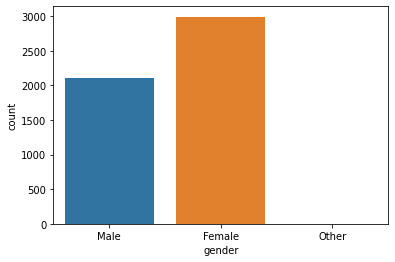

In [ ]:
sns.countplot(data=data,x='gender')

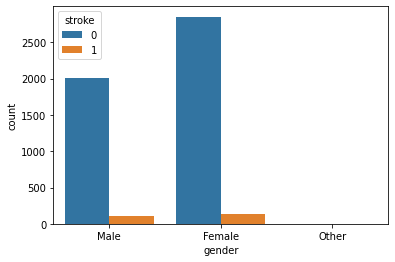

In [ ]:
sns.countplot(data=data,x='gender',hue='stroke')

we can note that there is not much difference between stroke rate concerning gender


##2- Age

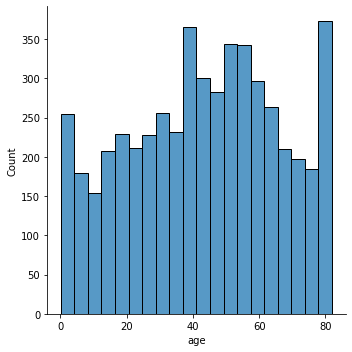

In [ ]:
sns.displot(data['age'])

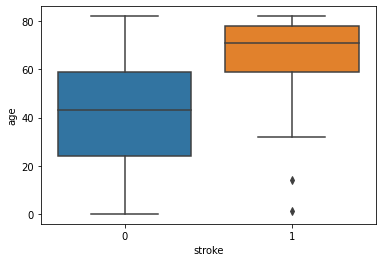

In [ ]:
sns.boxplot(data=data,x='stroke',y='age')

People aged more than 60 years tend to have a stroke

##3- Hypertension

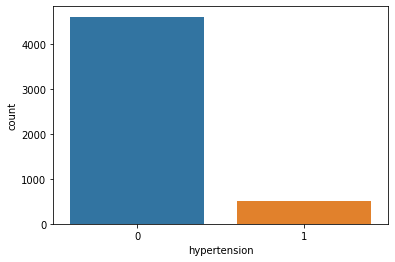

In [ ]:
sns.countplot(data=data,x='hypertension')

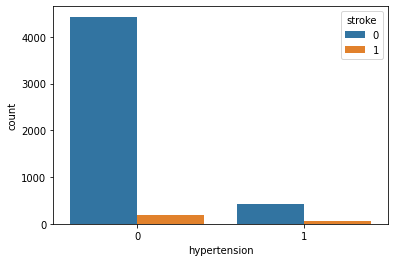

In [ ]:
sns.countplot(data=data,x='hypertension',hue='stroke')

hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. Based on our data picture is not that clear for hypertension. It has quite little data on patients having hypertension.

##4- Heart Disease

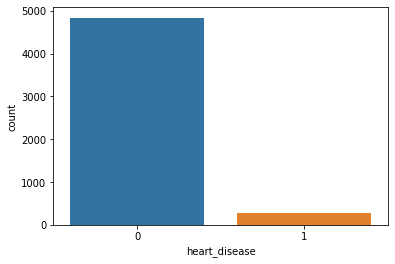

In [ ]:
sns.countplot(data=data,x='heart_disease')

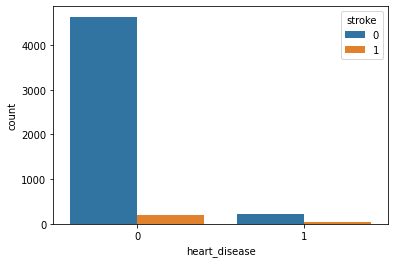

In [ ]:
sns.countplot(data=data,x='heart_disease', hue = "stroke")

Because of the imbalanced dataset, it’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

##5-Average Glucose Level

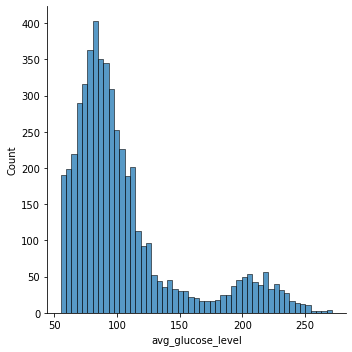

In [ ]:
sns.displot(data['avg_glucose_level'])


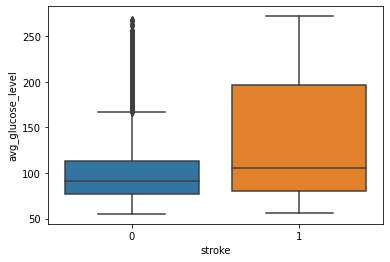

In [ ]:
sns.boxplot(data=data, x = "stroke", y='avg_glucose_level')

From this above graph, we can see that people having stroke have an average glucose level of more than 100. There are some obvious outliers in patients who have no stroke but there are some chances of this being genuine records.

##6- BMI

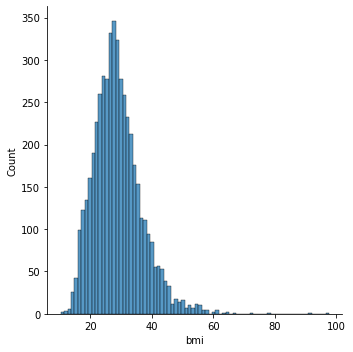

In [ ]:
sns.displot(data['bmi'])

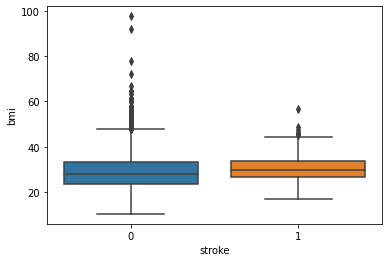

In [ ]:
sns.boxplot(data=data,x='stroke',y='bmi')

There is as such no prominent observation of how does BMI affects the chances of having a stroke

##7- Smoking status 

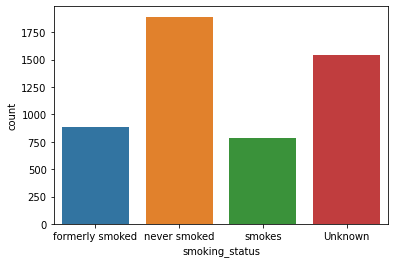

In [ ]:
sns.countplot(data=data,x='smoking_status')

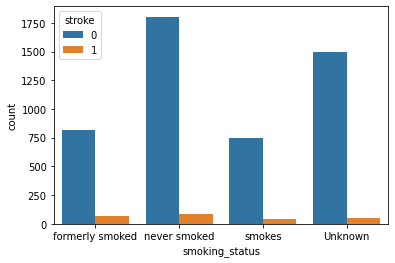

In [ ]:
sns.countplot(data=data,x='smoking_status',hue='stroke')

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status

##8- Ever Married

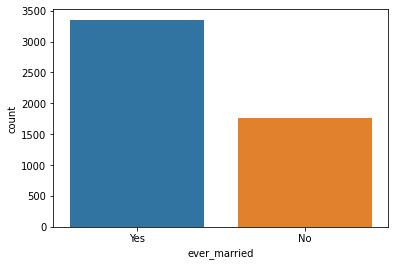

In [ ]:
sns.countplot(data=data,x='ever_married')

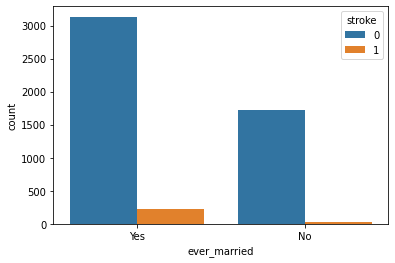

In [ ]:
sns.countplot(data=data,x='ever_married',hue='stroke')

##9-Work Type

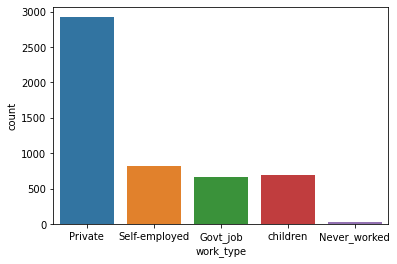

In [ ]:
sns.countplot(data=data,x='work_type')

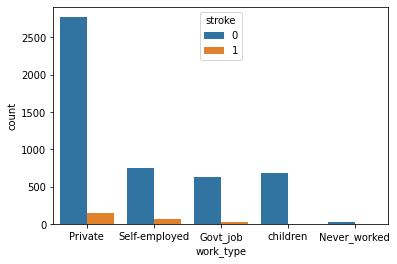

In [ ]:
sns.countplot(data=data,x='work_type',hue='stroke')

##10- Residence Type

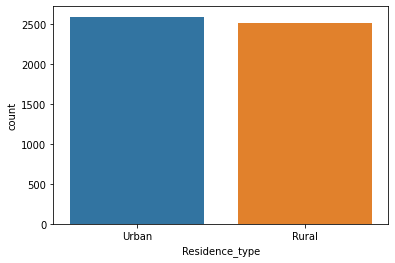

In [ ]:
sns.countplot(data=data,x='Residence_type')

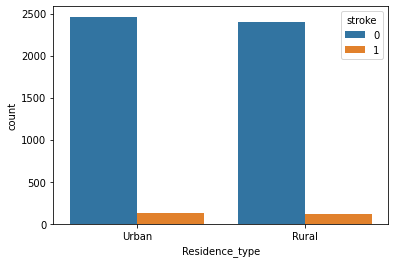

In [ ]:
sns.countplot(data=data,x='Residence_type',hue='stroke')

## Stroke

Text(0.5, 1.0, 'COUNT PLOT')

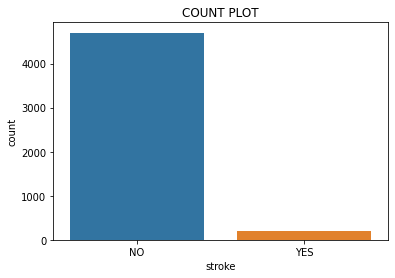

In [ ]:
sns.countplot(y)
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

In [ ]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


## Return The Correlation

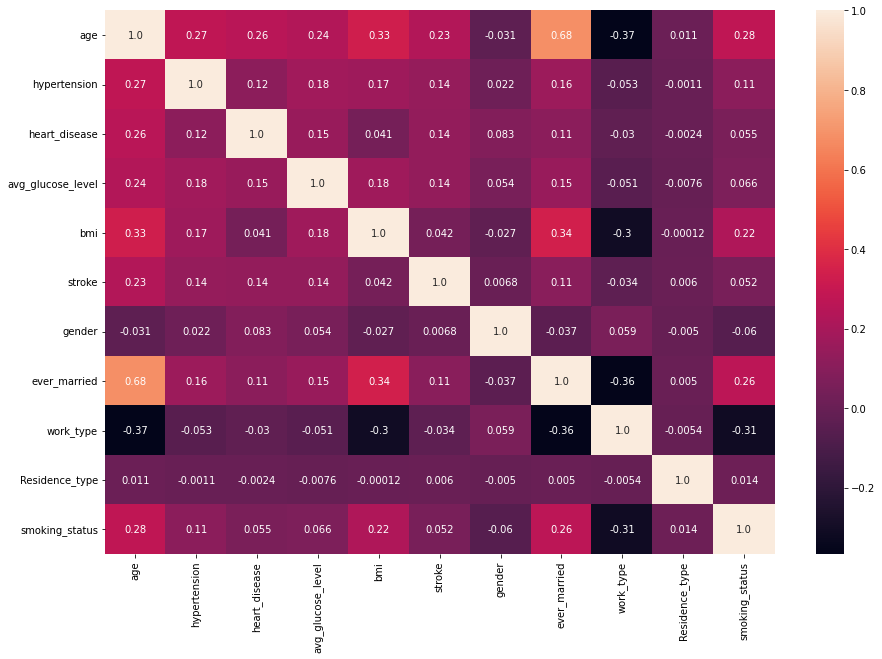

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

In [ ]:
# chose the type of classifier
classifier = SelectKBest(score_func=f_classif,k=5)
# fit the x and y to determine the score
fits = classifier.fit(x,y)
xx=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(x.columns)
# represent the classifire value in the table 
fscores = pd.concat([columns,xx],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
0,age,279.980918
1,hypertension,101.729361
3,avg_glucose_level,96.585072
2,heart_disease,95.175560
6,ever_married,54.796734
9,smoking_status,13.078821
4,bmi,8.826500
7,work_type,5.597754
5,gender,0.224073
8,Residence_type,0.178514


In the above result, we can see that age is a highly correlated variable and then it gets decreasing. I am keeping the threshold score as 90. Resulting in the same features we got in the heatmap.

# Build Fuzzy logic model 

import skfuzzy

In [ ]:
!pip install scikit-fuzzy > /dev/null 2>&1

In [ ]:
import skfuzzy as fuzz
import skfuzzy.membership as mf

Define the range for non catugural data 

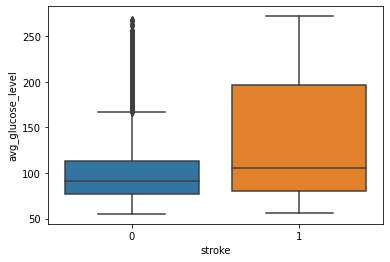

In [ ]:
sns.boxplot(data=data, x = "stroke", y='avg_glucose_level')

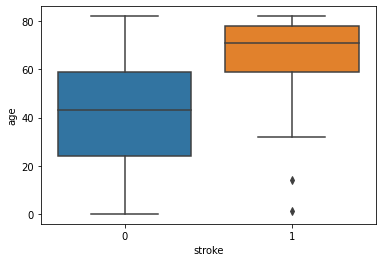

In [ ]:
sns.boxplot(data=data, x = "stroke", y='age')

In [ ]:
r_age = np.arange(0, 101)
r_avg	= np.arange(0, 201)
r_hy = np.arange(0,3)
r_hd = np.arange(0,3)
r_risk = np.arange(0, 111, 1)

patient data

In [ ]:

# in_age = int(input("Enter your age: "))
# in_bmi = int(input("Enter your BMI: "))
# print("Note 1 for True , 0 for False \n ")
# in_hypertension  = int(input("Do you have hypertension: "))
# in_heart_disease = int(input("Do you have heart disease "))
# in_gender = int(input("Are You Male: "))
# in_maried = int(input("Do you Married: "))
# in_smoking = int(input("are you smoking"))
# in_work = int("Is your work type Govt_job(1) or private(2) or self-employed(3) ")
# in_residence = int(input("Enter your type of residence urban(0) , Rural(1) "))


### Membership Functions 

In [ ]:
age_young = mf.trapmf(r_age, [-30, -5, 30, 40])
age_mid = mf.trapmf(r_age, [30, 40, 50, 60]) 
age_old = mf.trapmf(r_age, [50, 60, 80, 100])


avg_low = mf.trapmf(r_avg, [-30, -5, 50, 70])
avg_normal = mf.trapmf(r_avg, [70, 100, 120, 150])
avg_high = mf.trapmf(r_avg, [120, 150, 200 , 250])

hy_not = mf.trapmf(r_hy, [-30, -5, 0, 0.5 ])
hy_exc = mf.trapmf(r_hy, [0, 0.5, 1.1,1.2])

hd_not = mf.trapmf(r_hd, [-30, -5, 0, 0.5 ])
hd_exc = mf.trapmf(r_hd, [0, 0.5, 1.1,1.2])

risk_not = mf.trapmf(r_risk, [0 ,10 ,20 ,30])
risk_little = mf.trapmf(r_risk, [20 ,30 ,40 ,50])
risk_mid = mf.trapmf(r_risk, [40 ,50, 60 ,70])
risk_high = mf.trapmf(r_risk, [60 ,70, 80, 90])
risk_veryHigh = mf.trapmf(r_risk, [80, 90, 100, 110])


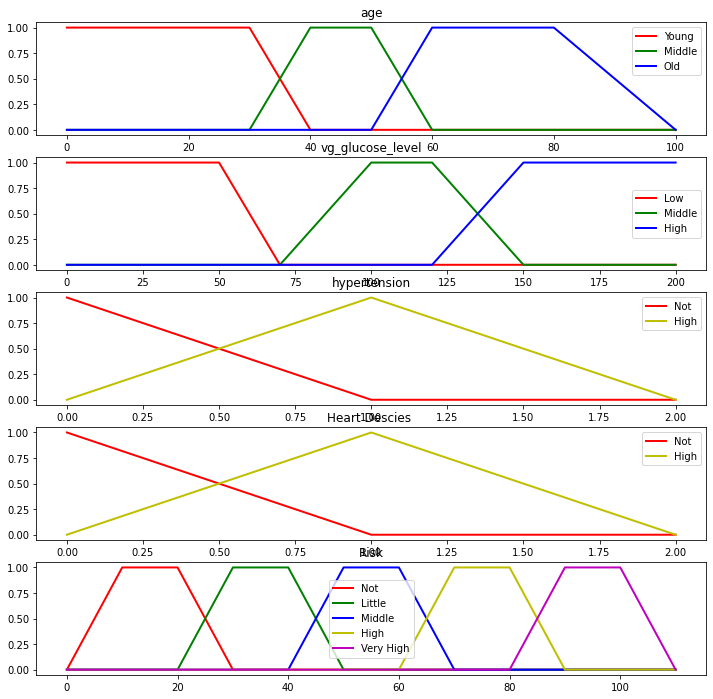

In [ ]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5, figsize =(12, 12))
ax0.plot(r_age, age_young, 'r', linewidth = 2, label = 'Young')
ax0.plot(r_age, age_mid, 'g', linewidth = 2, label = 'Middle')
ax0.plot(r_age, age_old, 'b', linewidth = 2, label = 'Old')
ax0.set_title('age')
ax0.legend()

ax1.plot(r_avg, avg_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(r_avg, avg_normal, 'g', linewidth = 2, label = 'Middle')
ax1.plot(r_avg, avg_high, 'b', linewidth = 2, label = 'High')
ax1.set_title('vg_glucose_level')
ax1.legend()

ax2.plot(r_hy, hy_not, 'r', linewidth = 2, label = 'Not')
ax2.plot(r_hy, hy_exc, 'y', linewidth = 2, label = 'High')
ax2.set_title('hypertension')
ax2.legend()

ax3.plot(r_hd, hd_not, 'r', linewidth = 2, label = 'Not')
ax3.plot(r_hd, hd_exc, 'y', linewidth = 2, label = 'High')
ax3.set_title('Heart Descies ')
ax3.legend()

ax4.plot(r_risk, risk_not, 'r', linewidth = 2, label = 'Not')
ax4.plot(r_risk, risk_little, 'g', linewidth = 2, label = 'Little')
ax4.plot(r_risk, risk_mid, 'b', linewidth = 2, label = 'Middle')
ax4.plot(r_risk, risk_high, 'y', linewidth = 2, label = 'High')
ax4.plot(r_risk, risk_veryHigh, 'm', linewidth = 2, label = 'Very High')
ax4.set_title('Risk')
ax4.legend()



# Fitt the Fuzzy with dataset


In [ ]:
def fuzzy (age, avg_golocose, hypertension, heart_decese):
    age_fit_young = fuzz.interp_membership(r_age, age_young, age)
    age_fit_mid = fuzz.interp_membership(r_age, age_mid, age)
    age_fit_old = fuzz.interp_membership(r_age, age_old,  age)

    avg_fit_low = fuzz.interp_membership(r_avg, avg_low, avg_golocose)
    avg_fit_mid = fuzz.interp_membership(r_avg, avg_normal, avg_golocose)
    avg_fit_high = fuzz.interp_membership(r_avg,avg_high , avg_golocose)

    hy_fit_not = fuzz.interp_membership(r_hy, hy_not, hypertension)
    hy_fit_exc = fuzz.interp_membership(r_hy, hy_exc, hypertension)    

    hd_fit_not = fuzz.interp_membership(r_hd, hd_not, heart_decese)
    hd_fit_exc = fuzz.interp_membership(r_hd, hd_exc, heart_decese)    


    rule1 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_low),hy_fit_not), hd_fit_not), risk_not)
    rule2 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_low),hy_fit_not), hd_fit_exc), risk_little) 
    rule3 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_low),hy_fit_exc), hd_fit_not), risk_little) 
    rule4 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_low),hy_fit_exc), hd_fit_exc), risk_mid) 

    rule5 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_mid),hy_fit_not), hd_fit_not), risk_little)
    rule6 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_mid),hy_fit_not), hd_fit_exc), risk_mid) 
    rule7 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_mid),hy_fit_exc), hd_fit_not), risk_mid)  
    rule8 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_mid),hy_fit_exc), hd_fit_exc), risk_high)   

    rule9  = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_high),hy_fit_not), hd_fit_not), risk_not)
    rule10 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_high),hy_fit_not), hd_fit_exc), risk_little) 
    rule11 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_high),hy_fit_exc), hd_fit_not), risk_little) 
    rule12 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_young ,avg_fit_high),hy_fit_exc), hd_fit_exc), risk_mid) 
   
    #
    rule13 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_low),hy_fit_not), hd_fit_not), risk_not)
    rule14 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_low),hy_fit_not), hd_fit_exc), risk_little) 
    rule15 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_low),hy_fit_exc), hd_fit_not), risk_little) 
    rule16 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_low),hy_fit_exc), hd_fit_exc), risk_mid) 

    rule17 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_mid),hy_fit_not), hd_fit_not), risk_little)
    rule18 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_mid),hy_fit_not), hd_fit_exc), risk_mid) 
    rule19 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_mid),hy_fit_exc), hd_fit_not), risk_mid)  
    rule20 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_mid),hy_fit_exc), hd_fit_exc), risk_high)   

    rule21 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_high),hy_fit_not), hd_fit_not), risk_not)
    rule22 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_high),hy_fit_not), hd_fit_exc), risk_little) 
    rule23 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_high),hy_fit_exc), hd_fit_not), risk_little) 
    rule24 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_mid ,avg_fit_high),hy_fit_exc), hd_fit_exc), risk_mid) 
   
    # 
    rule25 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_low),hy_fit_not), hd_fit_not), risk_little)
    rule26 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_low),hy_fit_not), hd_fit_exc), risk_mid) 
    rule27 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_low),hy_fit_exc), hd_fit_not), risk_mid) 
    rule28 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_low),hy_fit_exc), hd_fit_exc), risk_high) 

    rule29 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_mid),hy_fit_not), hd_fit_not), risk_mid)
    rule30 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_mid),hy_fit_not), hd_fit_exc), risk_high) 
    rule31 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_mid),hy_fit_exc), hd_fit_not), risk_high)  
    rule32 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_mid),hy_fit_exc), hd_fit_exc), risk_veryHigh)   

    rule33 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_high),hy_fit_not), hd_fit_not), risk_high)
    rule34 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_high),hy_fit_not), hd_fit_exc), risk_veryHigh) 
    rule35 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_high),hy_fit_exc), hd_fit_not), risk_veryHigh) 
    rule36 = np.fmin(np.fmin(np.fmin(np.fmin(age_fit_old ,avg_fit_high),hy_fit_exc), hd_fit_exc), risk_veryHigh) 

    #
    out_not = np.fmax(np.fmax(np.fmax(rule1,rule9),rule13),rule21)
    out_little = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule2,rule3),rule5),rule10),rule11),rule14),rule15),rule17),rule22),rule23),rule25)
    out_mid = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule4,rule6),rule7),rule12), rule16),rule18),rule19),rule24),rule26),rule27),rule29)
    out_high = np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(rule8, rule20),rule28),rule30),rule31),rule33),rule34)
    out_veryHigh = np.fmax(np.fmax(rule32,rule35), rule36)

    risk0 = np.zeros_like(r_risk)

    out_risk = np.fmax(np.fmax(np.fmax(np.fmax(out_not, out_little), out_mid), out_high), out_veryHigh)

    defuzzified  = fuzz.defuzz(r_risk, out_risk, 'centroid')
    

    return 1 if defuzzified > 50 else 0 

# Use fuzzy logic for prediction 

In [ ]:
fuzzy (age = 99, avg_golocose = 119, hypertension = 0, heart_decese = 1)

1

In [ ]:
from sklearn.metrics import accuracy_score
predict = []
for i in range(len(y)):
    predict.append(fuzzy(x["age"][i], x["avg_glucose_level"][i], x["hypertension"][i], x["heart_disease"][i]))
print("prediction accuracy: ",accuracy_score(y,predict))

prediction accuracy:  0.9476471786514565
